In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM6_07-17-24_control_P2_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M6_07-17-24_control_P2_videoTimestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M6_07-17-24_control_P2_stimulusTimestamp0.csv'

north_pixel = 126
south_pixel = 445
east_pixel = 485
west_pixel = 143
shelter_x_pixel = 458
shelter_y_pixel = 302

#estimate for when mouse reaches shelter
escape_done = 7.5 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
8479,8479,8479,6.462268,12.752208,0.996794,5.721651,11.390150,0.999910,5.052694,11.658928,...,4.287827,8.189698,0.999984,3.579901,6.522797,0.999819,2.692193,4.581429,0.999930,71.286988
8480,8480,8480,7.272858,14.200610,0.998235,6.612658,12.623094,0.999818,5.802728,12.941901,...,5.127303,9.678530,0.999902,4.352144,8.030443,0.999971,3.666612,6.197052,0.999855,71.327001
8481,8481,8481,7.822773,14.870204,0.975533,7.205580,13.953295,0.999941,6.594418,14.168106,...,5.766122,11.097871,0.999978,5.069905,9.421931,0.999942,4.391895,7.673127,0.999957,71.367705
8482,8482,8482,7.822773,14.870204,0.982884,7.205580,13.953295,0.999965,6.594418,14.168106,...,5.766122,11.097871,0.999974,5.069905,9.421931,0.999972,4.391895,7.673127,0.999978,71.407283
8483,8483,8483,7.822773,14.870204,0.994463,7.205580,13.953295,0.999759,6.594418,14.168106,...,5.766122,11.097871,0.999924,5.069905,9.421931,0.999928,4.391895,7.673127,0.999917,71.447014


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6698,6698,6698,-21.946269,1.408883,0.854517,-21.070911,1.380843,0.999999,-21.130255,0.407328,...,1.000000,-14.321884,1.301636,0.999999,0.029299,43.505370,23.980551,0.954306,3.071639,1.495940
6699,6699,6699,-22.451599,1.669231,0.322730,-22.017806,1.261440,0.999994,-22.168065,0.358239,...,1.000000,-15.234449,1.044774,1.000000,0.074035,44.468063,21.630524,0.967663,2.347403,-16.189127
6700,6700,6700,-22.956929,1.929579,0.691531,-22.812003,1.261440,0.999999,-22.949643,0.358239,...,0.999999,-16.202170,0.883004,0.999999,0.109273,45.287987,23.366300,0.823382,1.745368,-17.084802
6701,6701,6701,-23.462260,2.189927,0.135725,-23.653140,1.261440,0.999997,-23.790444,0.358239,...,0.999999,-16.932532,0.883004,0.999999,0.151142,46.132423,20.170000,0.844498,1.329675,-9.928433
6702,6702,6702,-23.967590,2.450275,0.112685,-24.202244,1.320654,0.999998,-24.412408,0.449433,...,1.000000,-17.656055,0.883004,1.000000,0.194675,46.686513,12.745923,0.554868,1.329224,-0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,6868,6868,14.170223,16.048679,0.917533,13.328275,15.491672,0.999961,12.763244,15.949677,...,0.999991,8.304583,11.170519,0.999929,6.831641,17.714922,19.301267,0.781180,1.369076,-2.396209
6869,6869,6869,15.062863,16.236003,0.990465,14.188398,15.844437,0.999920,13.672889,16.394937,...,0.999996,8.854492,12.239604,0.999983,6.870809,17.600609,24.622970,0.964432,1.255709,-2.894385
6870,6870,6870,15.855310,16.478066,0.974502,14.878600,16.239644,0.999976,14.377211,16.965827,...,0.999989,9.452634,12.840583,0.999966,6.911411,17.533732,18.346877,0.744920,1.119924,-3.344299
6871,6871,6871,16.286645,17.108386,0.802102,15.442656,16.764374,0.999853,14.840944,17.410171,...,0.999995,10.288676,13.102055,0.999987,6.951040,17.165586,22.603435,0.895752,1.312710,4.864775


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

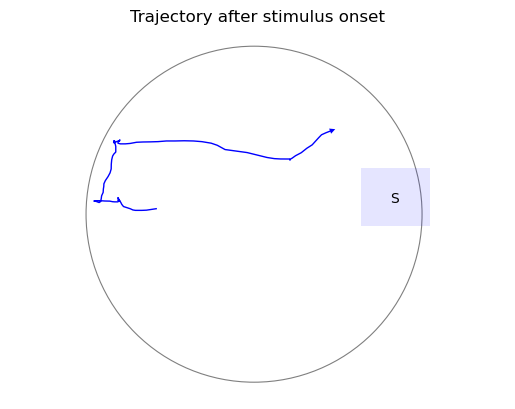

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

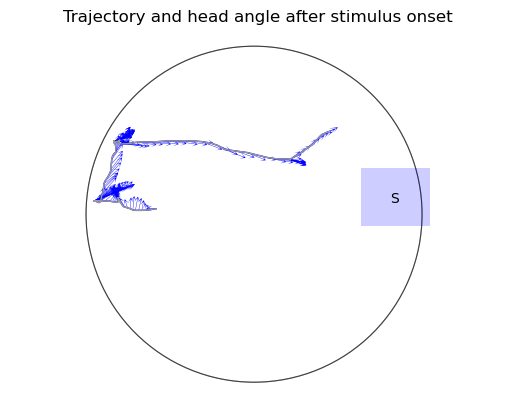

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6698,6698,6698,-21.946269,1.408883,0.854517,-21.070911,1.380843,0.999999,-21.130255,0.407328,...,1.000000,-14.321884,1.301636,0.999999,0.029299,43.505370,23.980551,0.954306,3.071639,1.495940
6699,6699,6699,-22.451599,1.669231,0.322730,-22.017806,1.261440,0.999994,-22.168065,0.358239,...,1.000000,-15.234449,1.044774,1.000000,0.074035,44.468063,21.630524,0.967663,2.347403,-16.189127
6700,6700,6700,-22.956929,1.929579,0.691531,-22.812003,1.261440,0.999999,-22.949643,0.358239,...,0.999999,-16.202170,0.883004,0.999999,0.109273,45.287987,23.366300,0.823382,1.745368,-17.084802
6701,6701,6701,-23.462260,2.189927,0.135725,-23.653140,1.261440,0.999997,-23.790444,0.358239,...,0.999999,-16.932532,0.883004,0.999999,0.151142,46.132423,20.170000,0.844498,1.329675,-9.928433
6702,6702,6702,-23.967590,2.450275,0.112685,-24.202244,1.320654,0.999998,-24.412408,0.449433,...,1.000000,-17.656055,0.883004,1.000000,0.194675,46.686513,12.745923,0.554868,1.329224,-0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,6868,6868,14.170223,16.048679,0.917533,13.328275,15.491672,0.999961,12.763244,15.949677,...,0.999991,8.304583,11.170519,0.999929,6.831641,17.714922,19.301267,0.781180,1.369076,-2.396209
6869,6869,6869,15.062863,16.236003,0.990465,14.188398,15.844437,0.999920,13.672889,16.394937,...,0.999996,8.854492,12.239604,0.999983,6.870809,17.600609,24.622970,0.964432,1.255709,-2.894385
6870,6870,6870,15.855310,16.478066,0.974502,14.878600,16.239644,0.999976,14.377211,16.965827,...,0.999989,9.452634,12.840583,0.999966,6.911411,17.533732,18.346877,0.744920,1.119924,-3.344299
6871,6871,6871,16.286645,17.108386,0.802102,15.442656,16.764374,0.999853,14.840944,17.410171,...,0.999995,10.288676,13.102055,0.999987,6.951040,17.165586,22.603435,0.895752,1.312710,4.864775


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

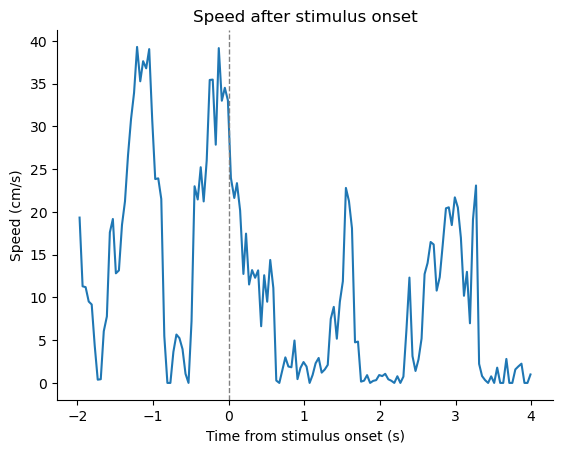

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

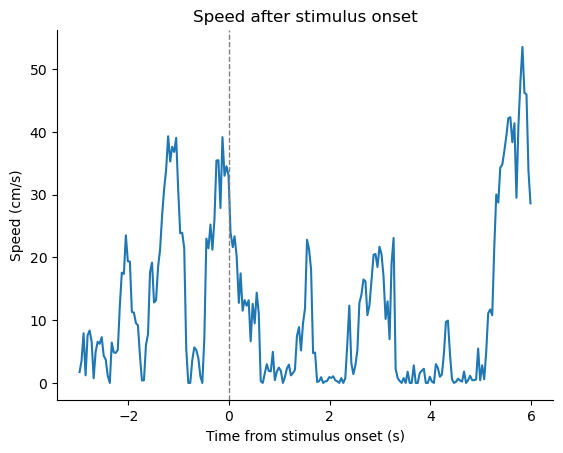

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

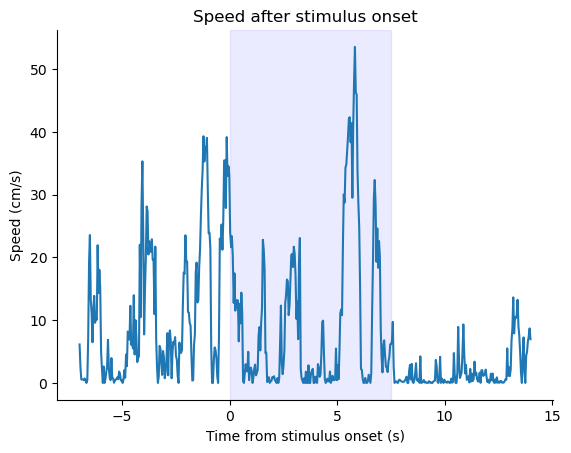

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

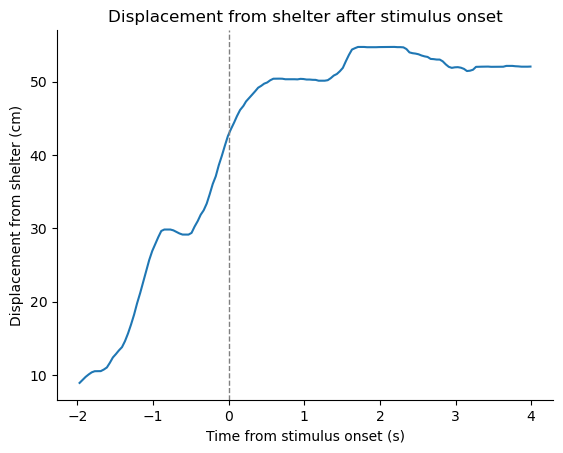

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

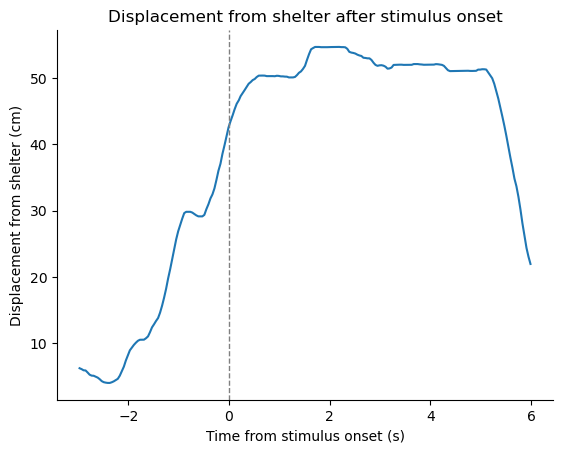

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

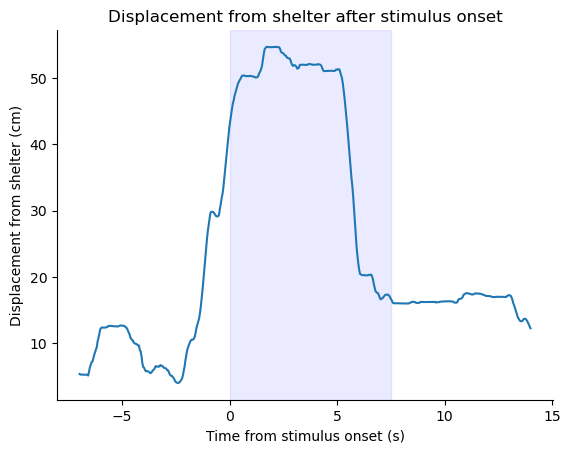

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

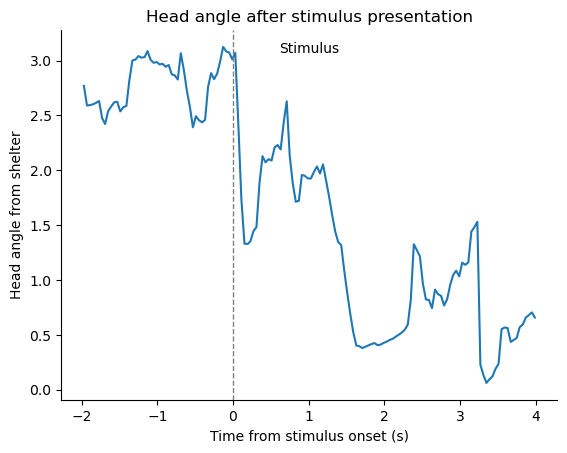

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

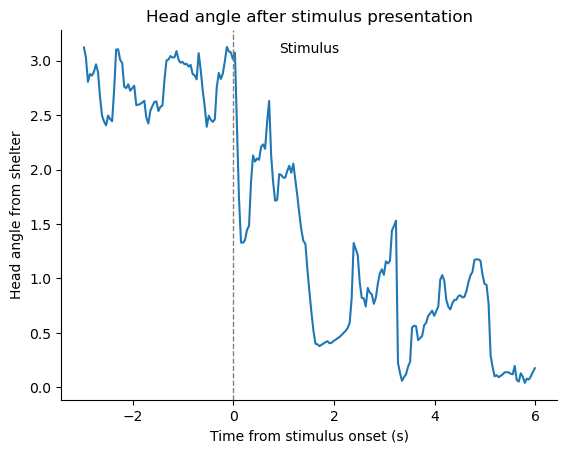

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

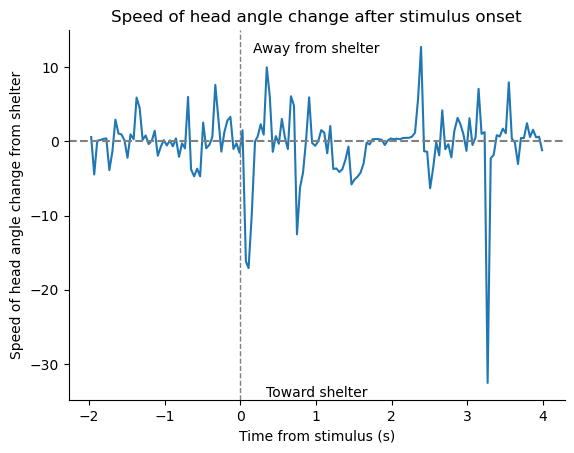

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6698,6698,6698,-21.946269,1.408883,0.854517,-21.070911,1.380843,0.999999,-21.130255,0.407328,...,1.000000,-14.321884,1.301636,0.999999,0.029299,43.505370,23.980551,0.954306,3.071639,1.495940
6699,6699,6699,-22.451599,1.669231,0.322730,-22.017806,1.261440,0.999994,-22.168065,0.358239,...,1.000000,-15.234449,1.044774,1.000000,0.074035,44.468063,21.630524,0.967663,2.347403,-16.189127
6700,6700,6700,-22.956929,1.929579,0.691531,-22.812003,1.261440,0.999999,-22.949643,0.358239,...,0.999999,-16.202170,0.883004,0.999999,0.109273,45.287987,23.366300,0.823382,1.745368,-17.084802
6701,6701,6701,-23.462260,2.189927,0.135725,-23.653140,1.261440,0.999997,-23.790444,0.358239,...,0.999999,-16.932532,0.883004,0.999999,0.151142,46.132423,20.170000,0.844498,1.329675,-9.928433
6702,6702,6702,-23.967590,2.450275,0.112685,-24.202244,1.320654,0.999998,-24.412408,0.449433,...,1.000000,-17.656055,0.883004,1.000000,0.194675,46.686513,12.745923,0.554868,1.329224,-0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,6868,6868,14.170223,16.048679,0.917533,13.328275,15.491672,0.999961,12.763244,15.949677,...,0.999991,8.304583,11.170519,0.999929,6.831641,17.714922,19.301267,0.781180,1.369076,-2.396209
6869,6869,6869,15.062863,16.236003,0.990465,14.188398,15.844437,0.999920,13.672889,16.394937,...,0.999996,8.854492,12.239604,0.999983,6.870809,17.600609,24.622970,0.964432,1.255709,-2.894385
6870,6870,6870,15.855310,16.478066,0.974502,14.878600,16.239644,0.999976,14.377211,16.965827,...,0.999989,9.452634,12.840583,0.999966,6.911411,17.533732,18.346877,0.744920,1.119924,-3.344299
6871,6871,6871,16.286645,17.108386,0.802102,15.442656,16.764374,0.999853,14.840944,17.410171,...,0.999995,10.288676,13.102055,0.999987,6.951040,17.165586,22.603435,0.895752,1.312710,4.864775


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6698,6698,6698,-21.946269,1.408883,0.854517,-21.070911,1.380843,0.999999,-21.130255,0.407328,...,1.000000,-14.321884,1.301636,0.999999,0.029299,43.505370,23.980551,0.954306,3.071639,1.495940
6699,6699,6699,-22.451599,1.669231,0.322730,-22.017806,1.261440,0.999994,-22.168065,0.358239,...,1.000000,-15.234449,1.044774,1.000000,0.074035,44.468063,21.630524,0.967663,2.347403,-16.189127
6700,6700,6700,-22.956929,1.929579,0.691531,-22.812003,1.261440,0.999999,-22.949643,0.358239,...,0.999999,-16.202170,0.883004,0.999999,0.109273,45.287987,23.366300,0.823382,1.745368,-17.084802
6701,6701,6701,-23.462260,2.189927,0.135725,-23.653140,1.261440,0.999997,-23.790444,0.358239,...,0.999999,-16.932532,0.883004,0.999999,0.151142,46.132423,20.170000,0.844498,1.329675,-9.928433
6702,6702,6702,-23.967590,2.450275,0.112685,-24.202244,1.320654,0.999998,-24.412408,0.449433,...,1.000000,-17.656055,0.883004,1.000000,0.194675,46.686513,12.745923,0.554868,1.329224,-0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,6871,6871,16.286645,17.108386,0.802102,15.442656,16.764374,0.999853,14.840944,17.410171,...,0.999995,10.288676,13.102055,0.999987,6.951040,17.165586,22.603435,0.895752,1.312710,4.864775
6872,6872,6872,16.684619,17.108386,0.857640,15.974054,16.764374,0.999957,15.378693,17.410171,...,0.999968,11.149920,13.246114,0.999954,6.990784,16.828517,20.139273,0.800415,1.401945,2.245246
6889,6889,6889,16.590414,12.019437,0.841016,15.992419,12.902767,0.999950,16.489263,13.386280,...,0.999877,11.445741,15.478011,0.999846,7.672140,16.039985,0.000000,0.000000,0.187421,2.252202
6890,6890,6890,16.348880,11.842392,0.777289,15.735266,12.756701,0.999873,16.398449,13.110808,...,0.999888,11.453193,15.519695,0.999781,7.711065,16.043723,0.139726,0.005439,0.212085,0.633635


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

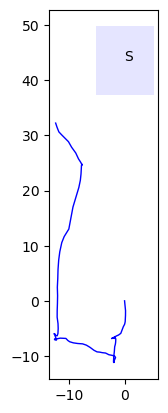

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


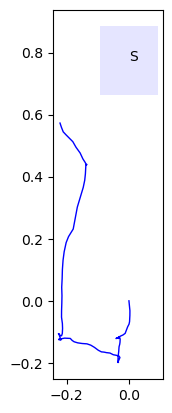

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

